# EDA and Preprocessing for credit card default prediction data

### Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

### Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

### Results:
You have to build a solution that should able to predict the probability of credit default based on credit card owner’s characteristics and payment history.

## Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import numpy as np

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os,sys
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


 ### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.drop(['ID'],axis=1,inplace=True)

 ### Show Top 5 Records

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [49]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


### Shape of the dataset



In [63]:
df.shape

(30000, 24)

No. of rows and columns in dataset (30000,25)

### columns in dataset

In [64]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

The columns in dataset is a mix of numerical and catagorical columns

 ### Check data types

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

The datatype of columns is int or float not object

### check unique values

In [5]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

There are unique values in dataset 

### 3.1 Check Missing values

In [20]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No missing value in dataset

### Check Duplicates

In [5]:
df.duplicated().sum()

35

In [6]:
# Find duplicate rows
duplicated_indices = df[df.duplicated()].index

# Display the row numbers of duplicate rows
print("Row Numbers of Duplicate Rows:")
print(duplicated_indices)

Row Numbers of Duplicate Rows:
Int64Index([ 1980,  4585,  6022,  6466,  7319,  8320, 10250, 13106, 14294,
            15458, 15617, 15685, 17032, 19114, 19487, 19604, 19897, 20875,
            21881, 22162, 23877, 24122, 25608, 26249, 26805, 27351, 27765,
            27928, 27966, 28228, 28779, 28983, 29265, 29823, 29909],
           dtype='int64')


In [5]:
# Drop duplicate rows
df = df.drop_duplicates()

### Check statistics of data set

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_0,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


### insights 


min amount and max amount of bill_amt_columns ,and pay_amt_columns has huge difference

### renaming column names  and making adjustments so that it would be easy to code 

In [77]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df.rename(columns = {'LIMIT_BAL': 'limit_bal', 'SEX':'sex', 'EDUCATION':'education', 'MARRIAGE':'marriage', 'AGE':'age'},inplace=True)

In [7]:
pay_columns=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
pay_amt_columns=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
bill_amt_columns=df[[ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [8]:
cat_columns=df[['limit_bal','sex','education','marriage','age','default.payment.next.month']]

## Exploring Data

,Count,Percent Split
Not Default,23335,77.874187
Default,6630,22.125813


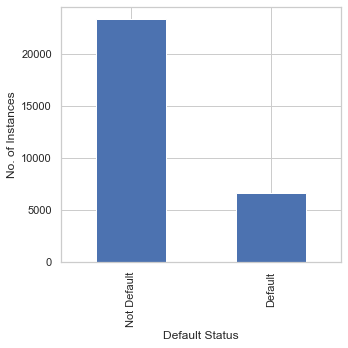

In [81]:
total_cnt = df.shape[0]

cls_cnt = df['default.payment.next.month'].value_counts()
cls_stats = pd.DataFrame ({"Count": [cls_cnt[0], cls_cnt[1]],\
                        "Percent Split" : [((cls_cnt[0] * 100.0) /total_cnt), ((cls_cnt[1] * 100.0) /total_cnt)]},
                         index=["Not Default", "Default"])
display(cls_stats)
plt.figure(figsize=(5,5))
ax = cls_cnt.plot(kind='bar')
ax.set_xlabel("Default Status")
ax.set_ylabel("No. of Instances")
ax.set_xticklabels(['Not Default', 'Default'])
#     for p in ax.patches:
#         ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+300))
plt.tight_layout()
plt.show()

#### Data is imbalanced

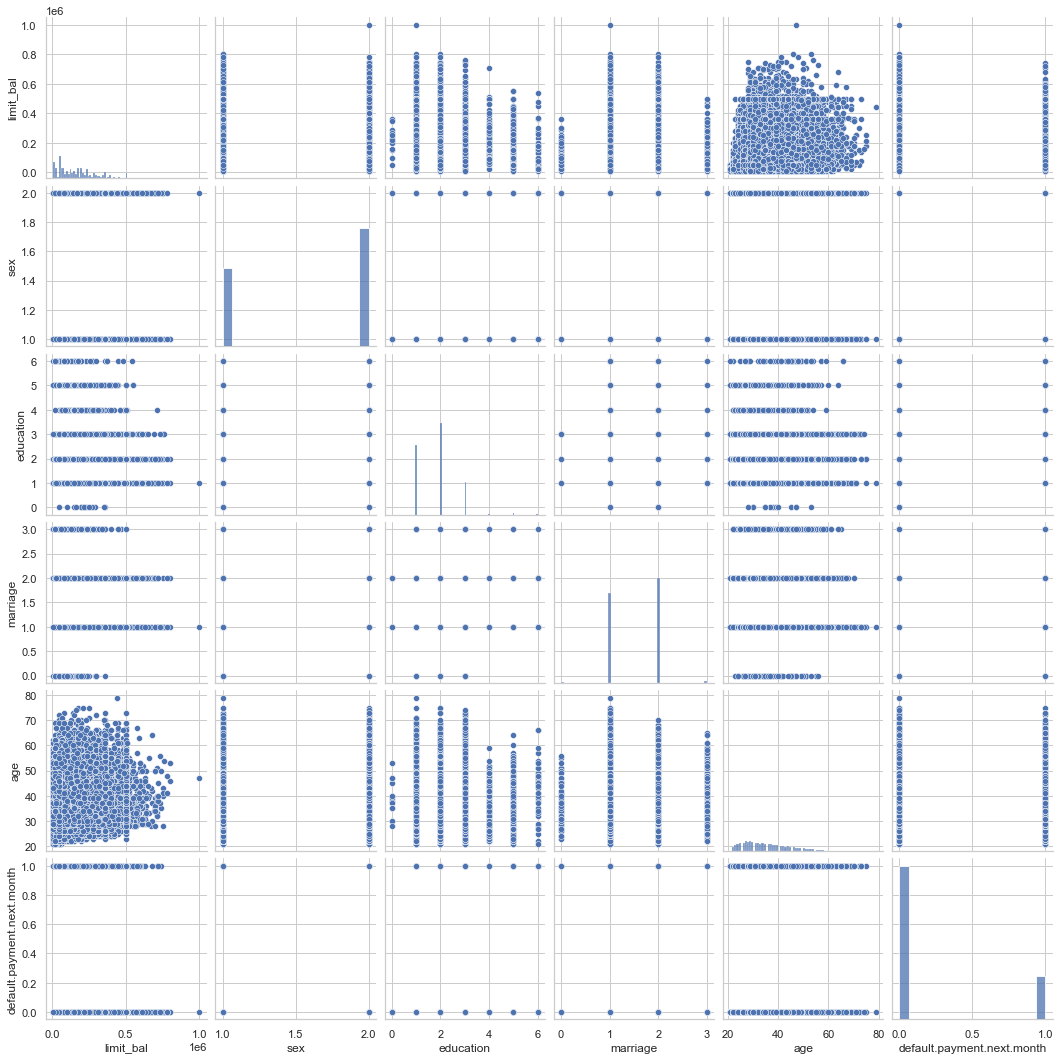

In [82]:
sns.pairplot(cat_columns)

From pairplot we can observe that age,education and marriage columns are divided in to various groups and catagories therefore ;
we can drop those variables in catagorical columns which are not providing more relevent information.

Dataset has outliars. 

We can observe that most of the variables in age column have limtbal upto 0.6 approximatly.

In [9]:
pd.value_counts(df['limit_bal']>800000)

False    29964
True         1
Name: limit_bal, dtype: int64

 maximum limit_bal is upto (1000000) of which 0.8 is 800000 and there are only 71 value above it so, we can drop this value.

In [10]:
# Find the row(s) where 'limit_bal' > 800,000
row_with_condition = df[df['limit_bal'] > 800000]

# Display the row(s) that meet the condition
print("Row(s) where 'limit_bal' > 800,000:")
print(row_with_condition)

Row(s) where 'limit_bal' > 800,000:
      limit_bal  sex  education  marriage  age  PAY_0  PAY_2  PAY_3  PAY_4  \
2197  1000000.0    2          1         1   47      0      0      0     -1   

      PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
2197      0  ...   891586.0   927171.0   961664.0   50784.0   50723.0   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
2197  896040.0   50000.0   50000.0   50256.0                           0  

[1 rows x 24 columns]


In [9]:
df.drop(index=[2197],axis=0,inplace=True)


#### i have only droped the row not values above 800000 because that row was a outlier

<AxesSubplot:>

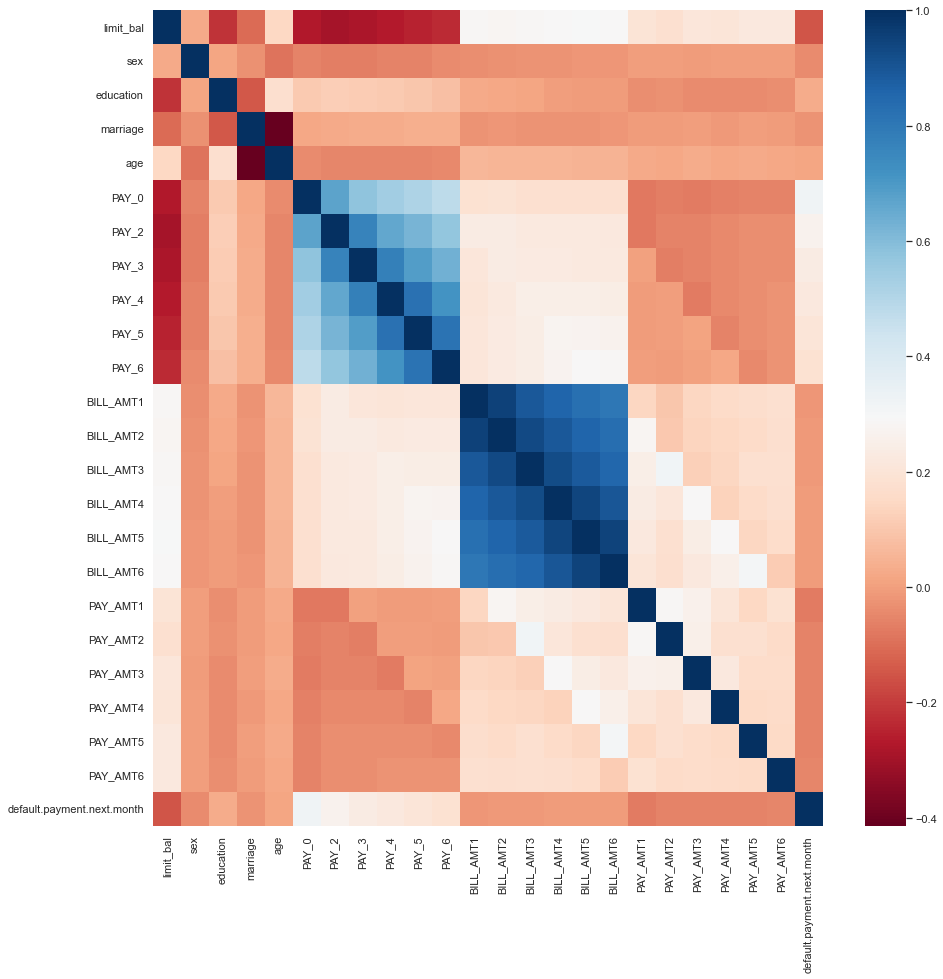

In [88]:
plt.subplots(figsize= (15, 15))
sns.heatmap(df.corr(),cmap='RdBu')

From this heatmap we can observe that bill_amt_columns are highly correlated with each other internally(default in credit 
amount increses bill amount ).

Age is negatively correlated with marriage.

Pay_columns have positive correlation and it is providing a pattern pay_0 is positively correlated with pay_2 ,pay_2 is
positively related with pay_3 and so on  (from this i could understand is that it shows if a person could not pay first 
credit amount to bank it gets added to next paymentbill and result in increase in payment status amount ).

limitbal column is negatively correlated with pay_columns (from this i could interpret is that as a person does payment of his
credit amount bill the withdrawl of that amount to pay for credit amount results in negative correlation due to withdrawl of 
amount the limitbal in person s bank account decreases and he pays with that amount which in turn increses his pay status to paid ).


In [42]:
variable_1=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

<AxesSubplot:>

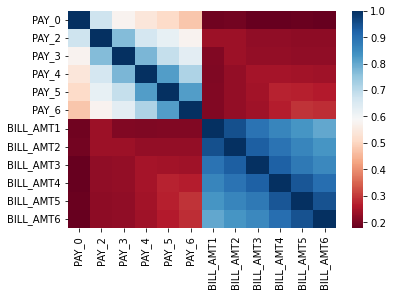

In [43]:
sns.heatmap(variable_1.corr(),cmap='RdBu')

In [44]:
variable=df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]]

<AxesSubplot:>

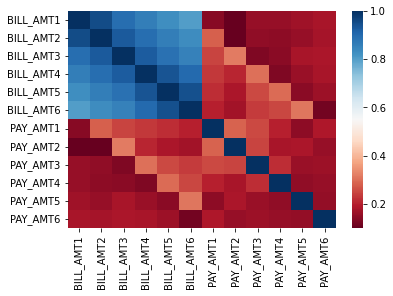

In [45]:
sns.heatmap(variable.corr(),cmap='RdBu')

In [89]:
threshold=0.8

In [90]:
def corr(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [91]:
corr(df.iloc[:,:-1],threshold)

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6'}

columns having more than 80% correlation

In [14]:
bins = [20,30,40,50,60,70,80]


In [15]:
df['age']=pd.cut(df['age'],bins=bins)

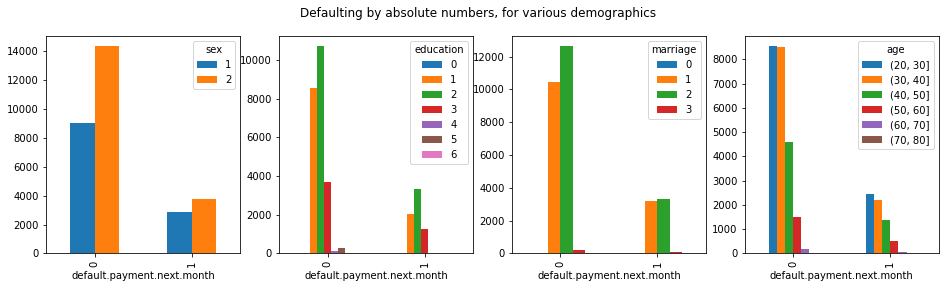

In [50]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['default.payment.next.month', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['default.payment.next.month', 'education']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['default.payment.next.month', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby(['default.payment.next.month', 'age']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

As per documentation of the dataset:

For education, we only have following
1 = graduate school; 2 = university; 3 = high school; 4 = others
We will replace 0,5,6 with 'others'

In sex 1=male, 2=female

In marriage 1=married,2=single,3=others

Distribution of Gender:
Female credit card holders are more compared to Male
Female defaulters are more compared to Male


Distribution of Marriage:
Single are holding more credit cards compared to Married and Others
Within defaulters Marital status with Others is very minimal. Married and Single have same number of defaulters


Distribution of Education:
People with education value as Graduate and University have more credit cards.


Distribution by Age:
Age 60 to 70 and Age 70 to 80 have very less credit card holders
Age 20 to 30 and 30 to 40 have more defaulters

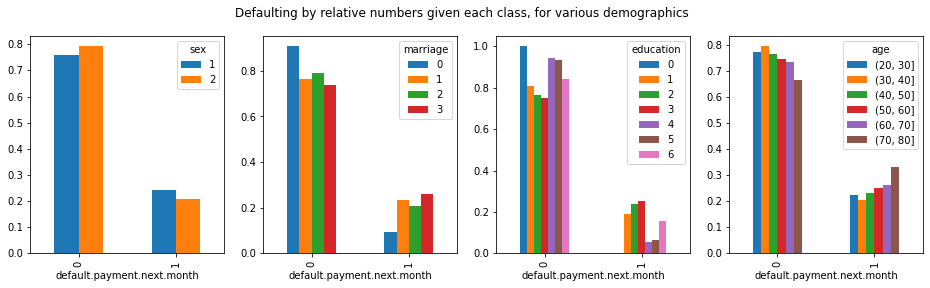

In [67]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['default.payment.next.month', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['default.payment.next.month', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['default.payment.next.month', 'education']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = df.groupby(['default.payment.next.month', 'age']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

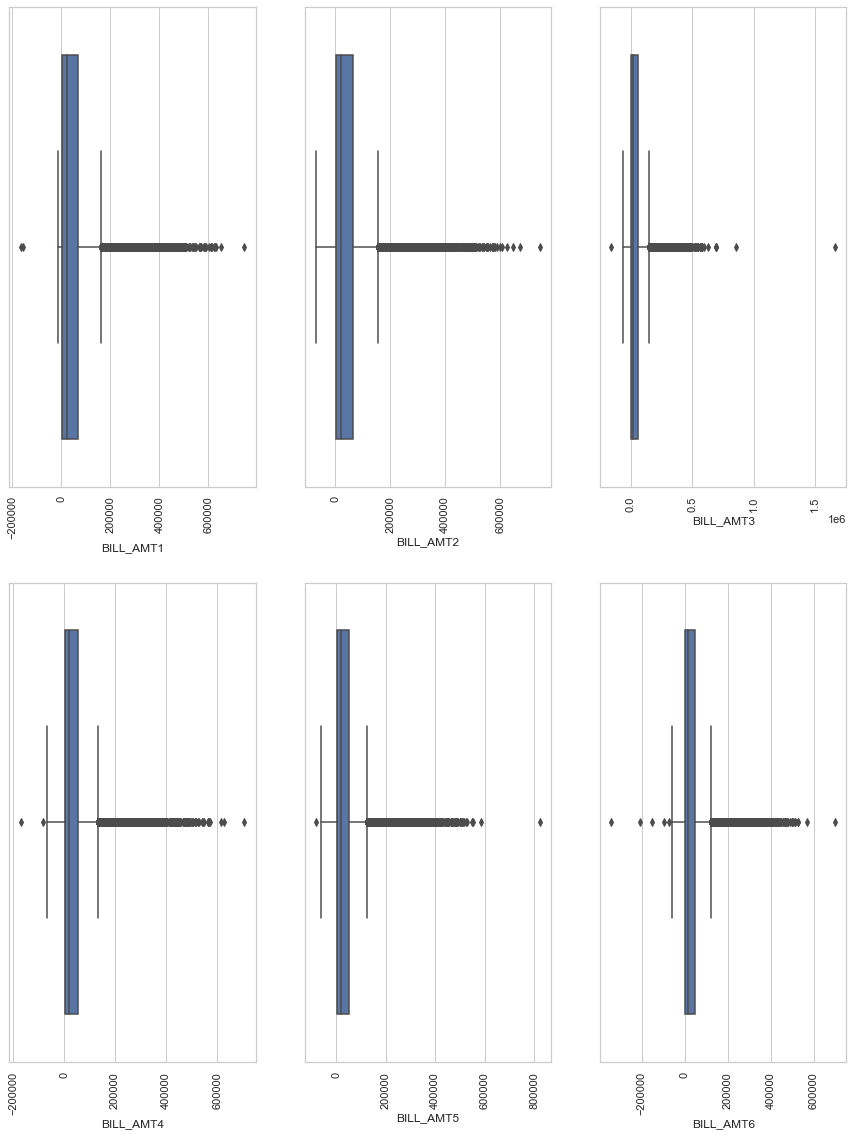

In [92]:
plt.figure(figsize = (15,30))
for i in enumerate(bill_amt_columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(i[1],hue="default.payment.next.month",data=df,orient="v")
    plt.xticks(rotation = 90)

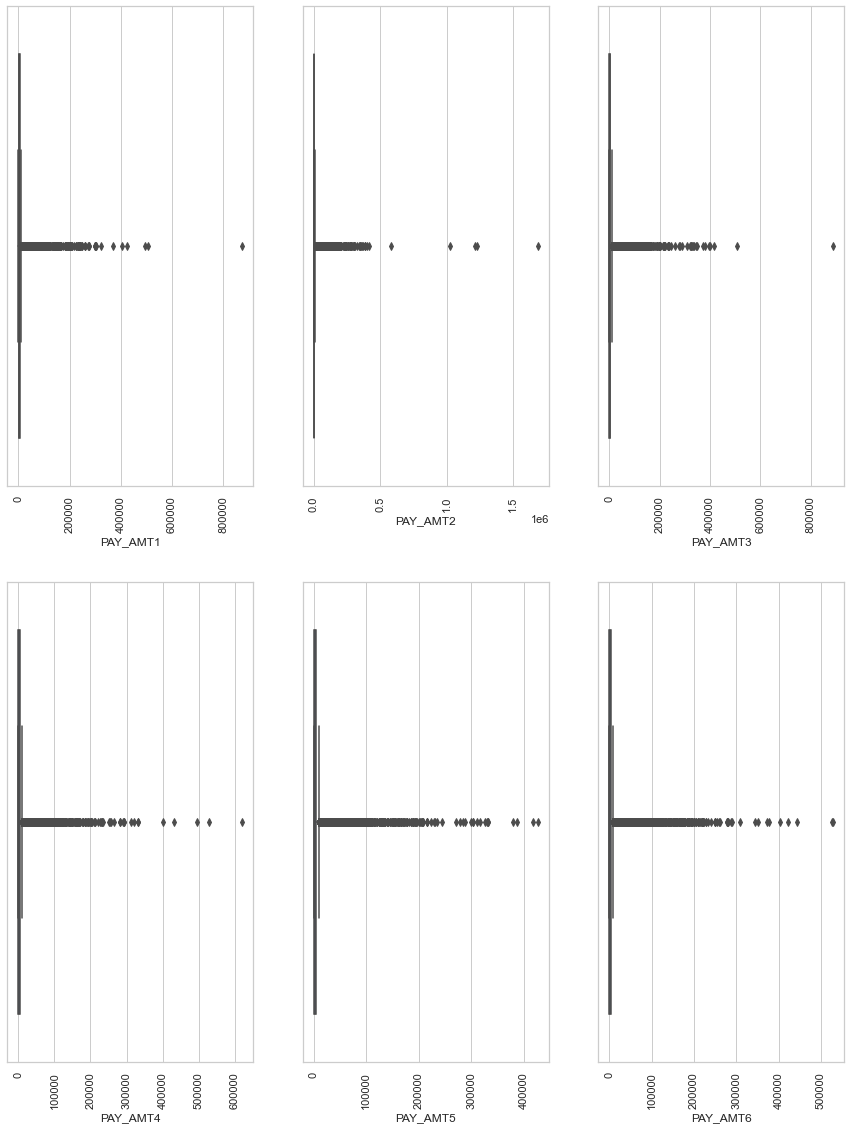

In [93]:
plt.figure(figsize = (15,30))
for i in enumerate(pay_amt_columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(i[1],hue="default.payment.next.month",data=df,orient="v")
    plt.xticks(rotation = 90)

As it can be observed that data is infested with outliers(by the logic of extreme values beyond 1.5*IQR),
but since removing them would cost lot of valuable loss of information.We decided not to treat them as ouliers.

In [98]:
numerical_columns=df[['limit_bal', 'age', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']]

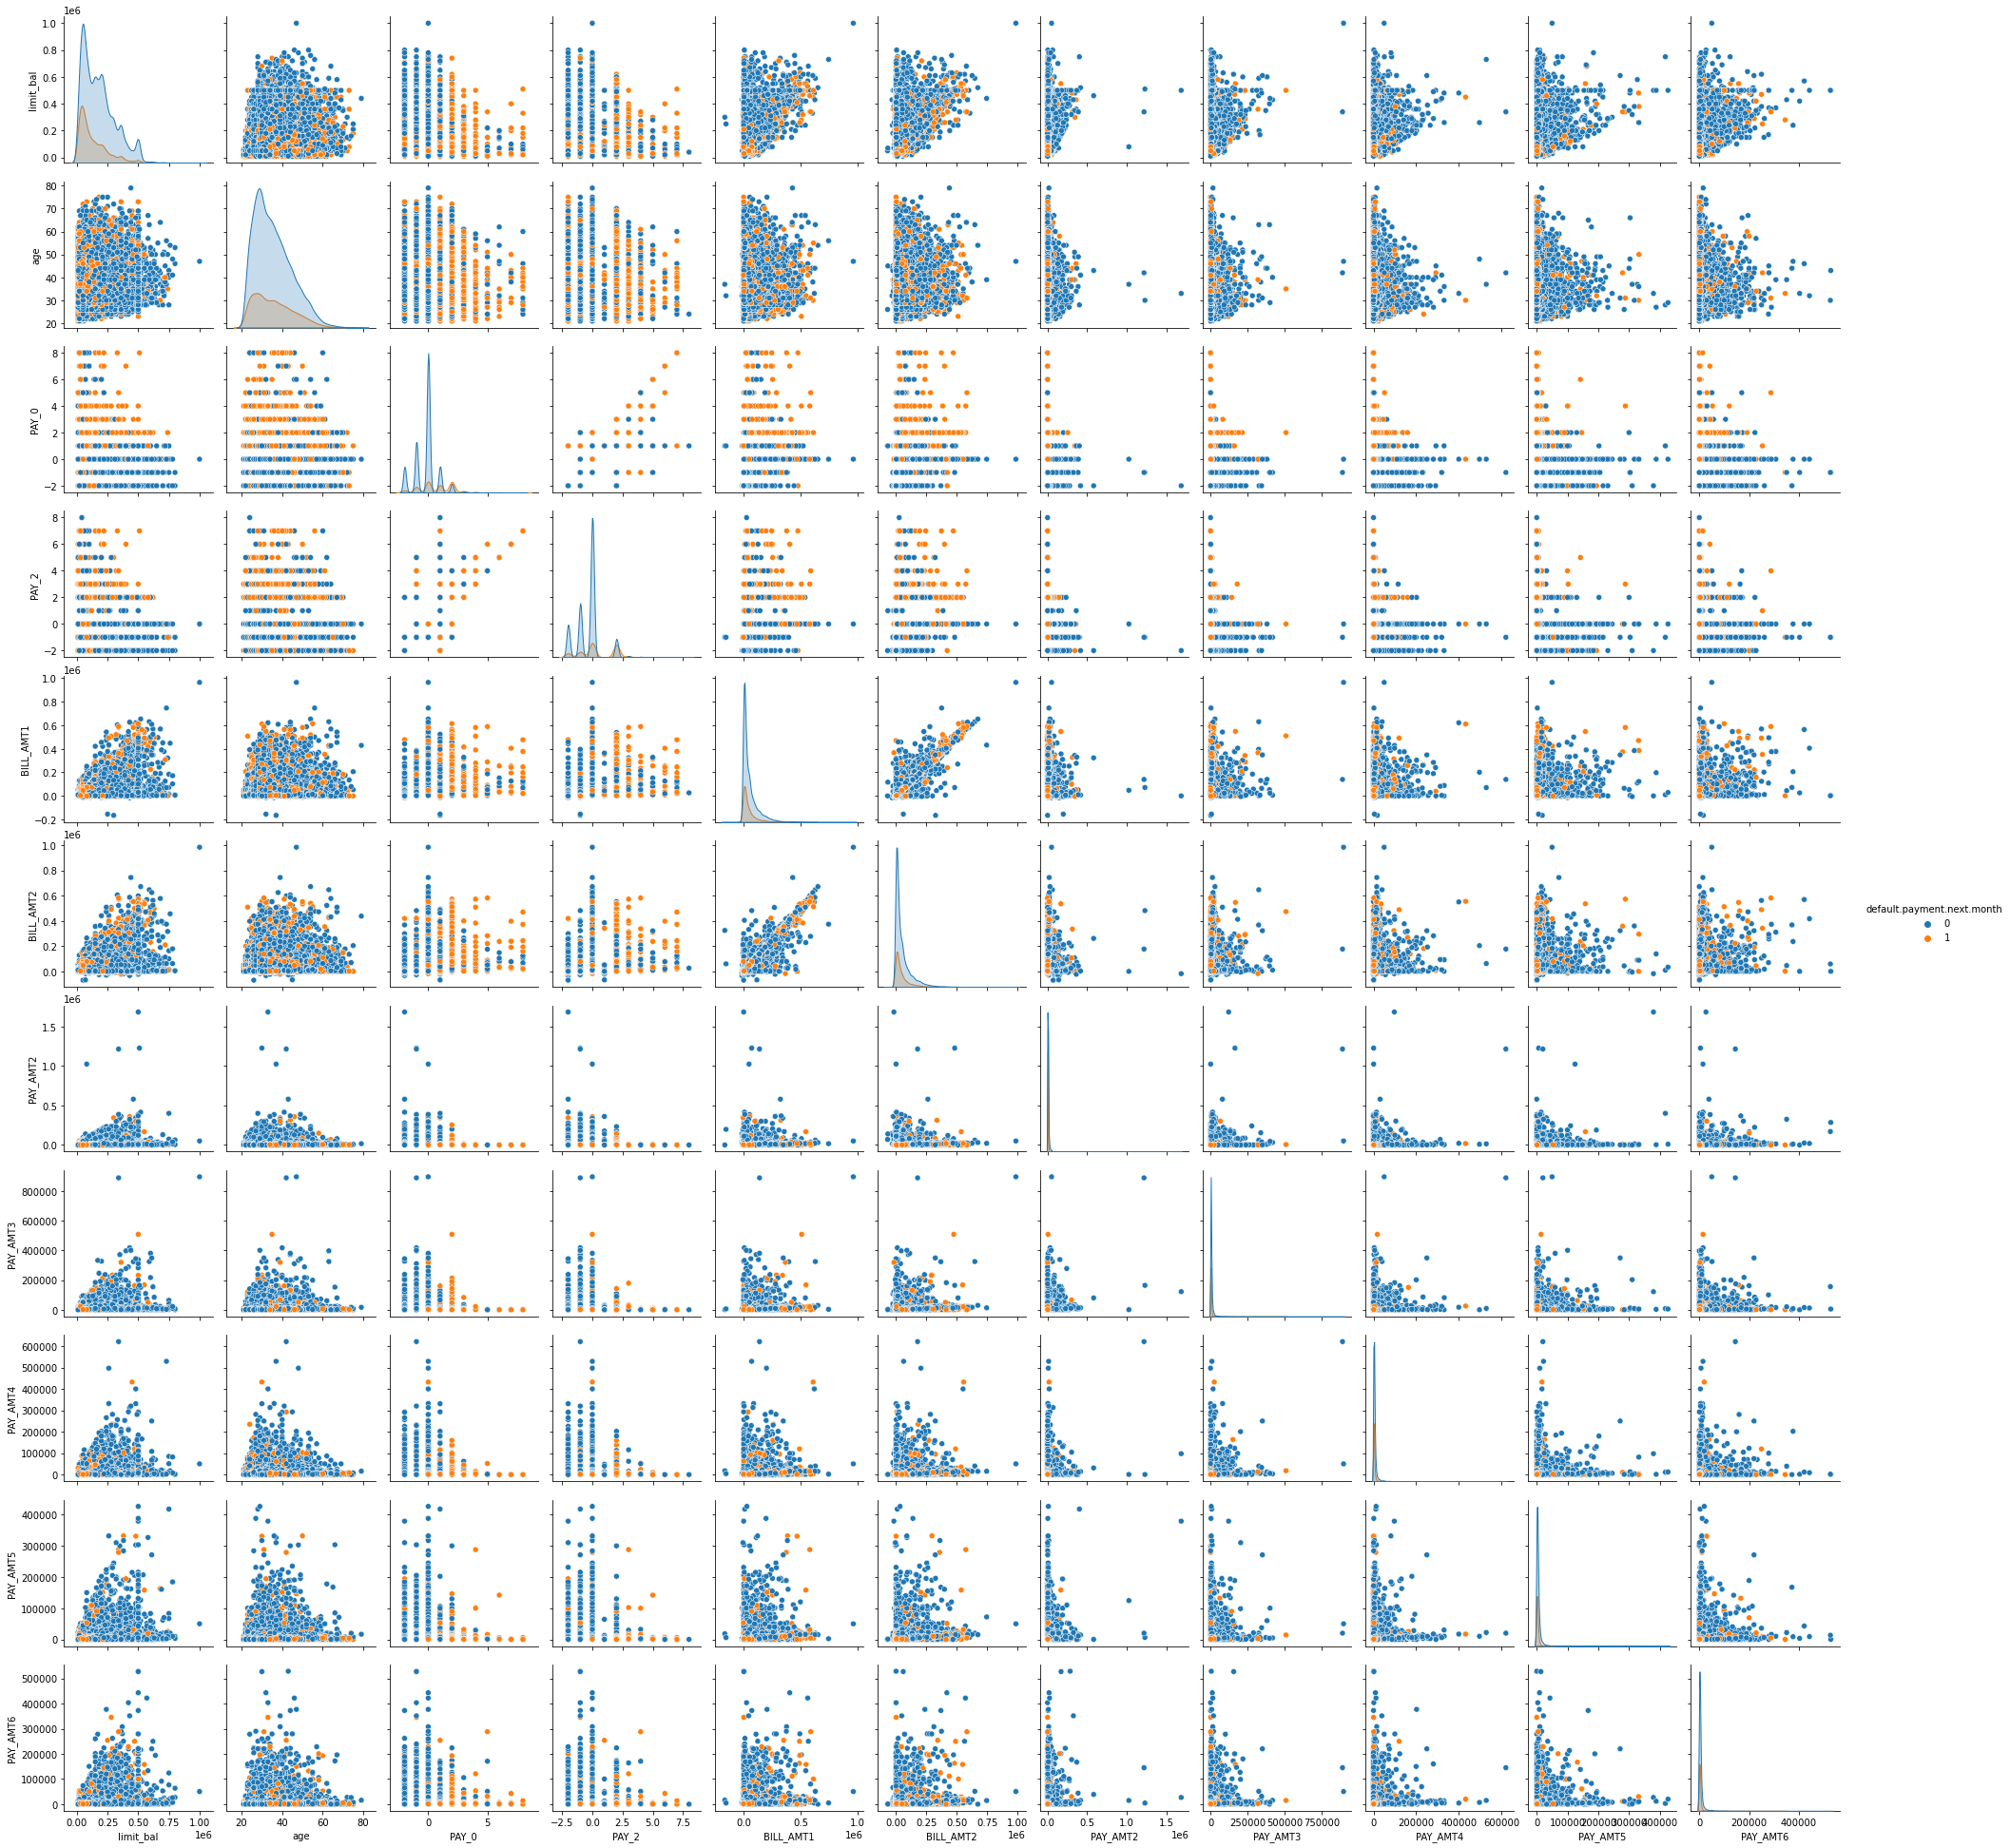

In [12]:
sns.pairplot(numerical_columns, hue = "default.payment.next.month")

### percentile capping

In [10]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [11]:
percentile_capping(df,bill_amt_columns, 0.01, 0.01)
percentile_capping(df,pay_amt_columns, 0.01, 0.01)

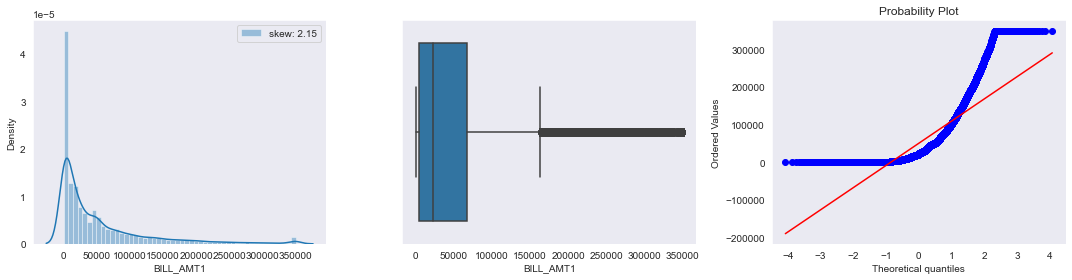

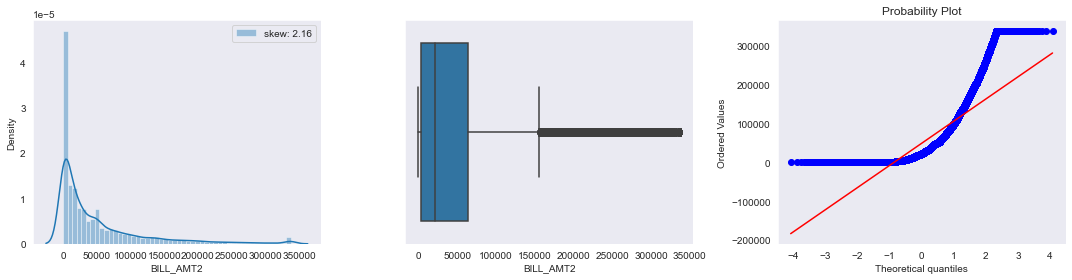

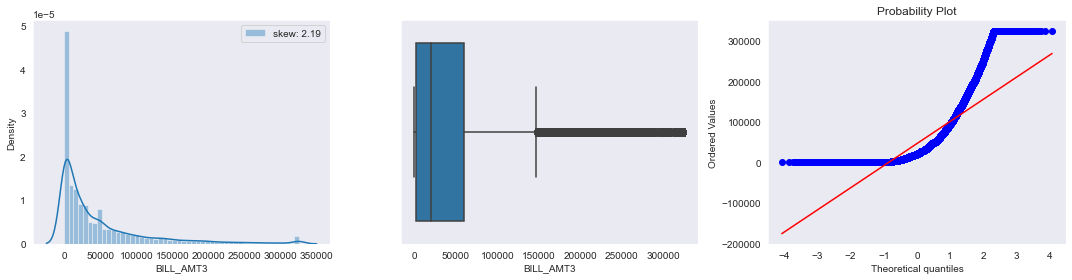

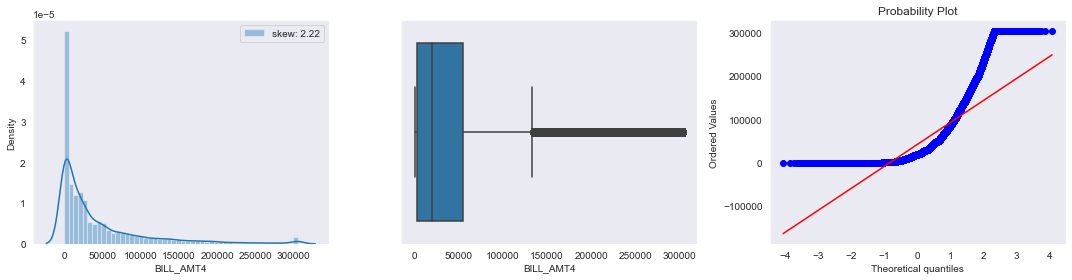

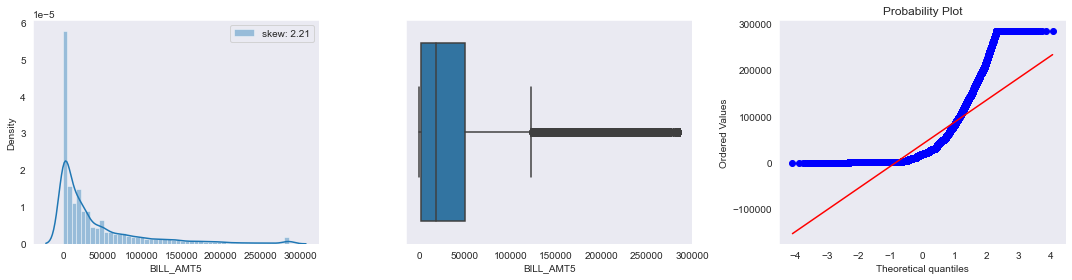

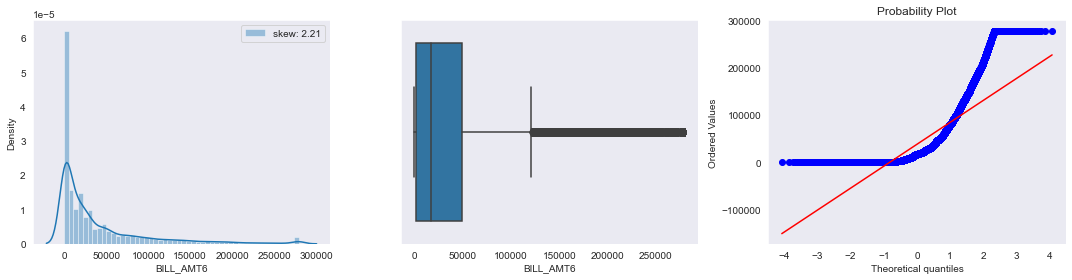

In [24]:
sns.set_style('dark')
for col in bill_amt_columns :
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

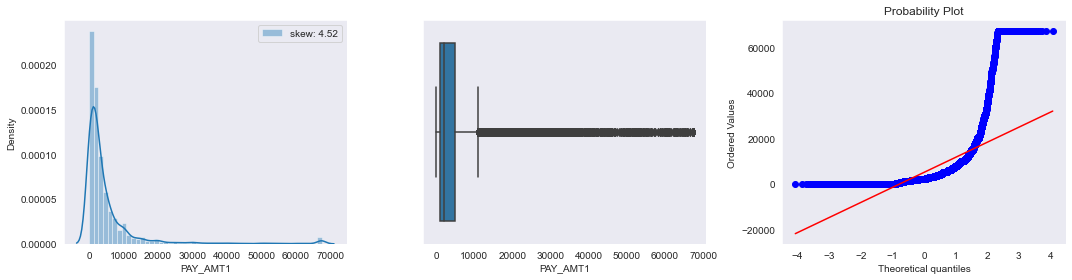

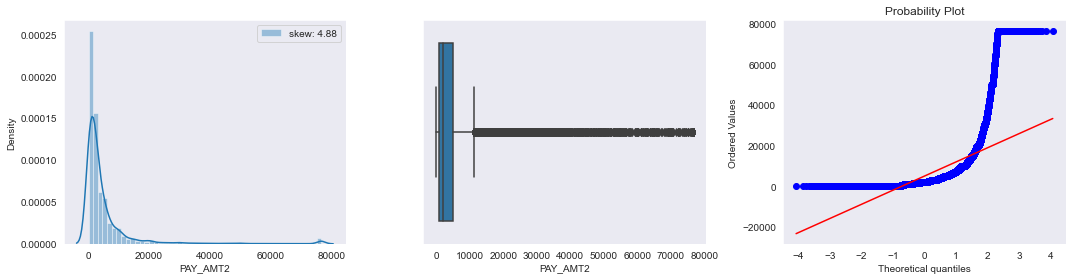

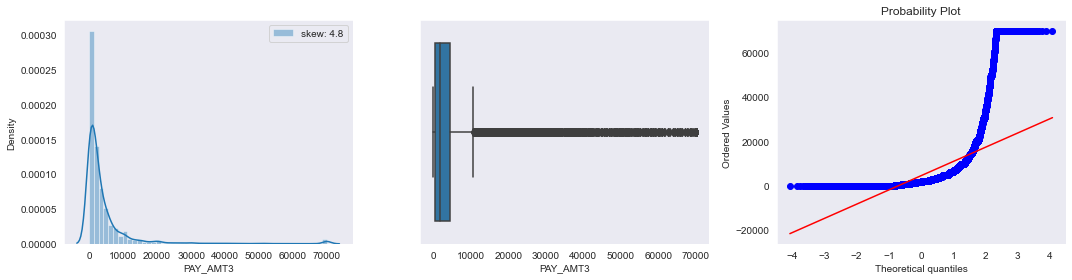

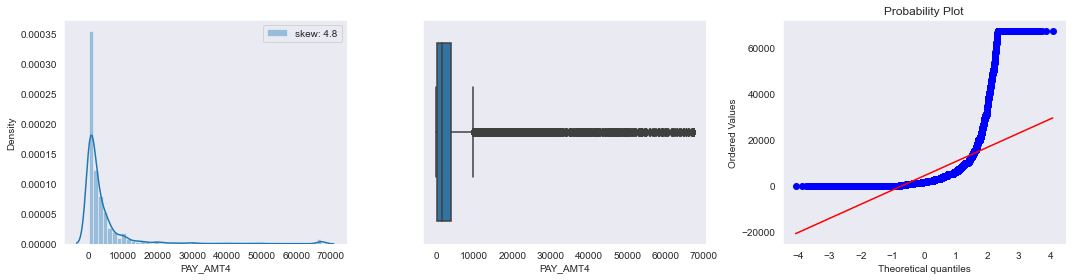

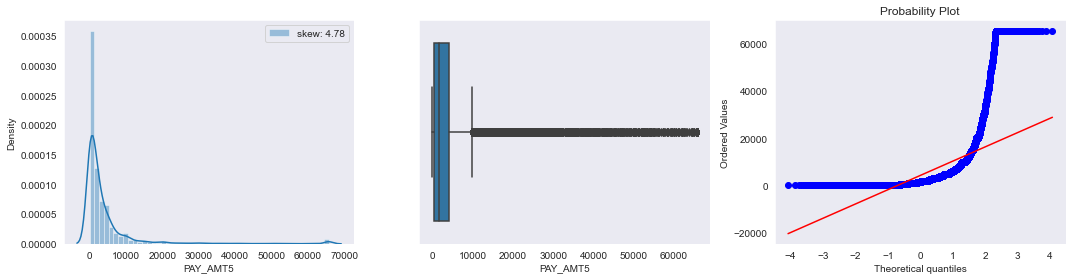

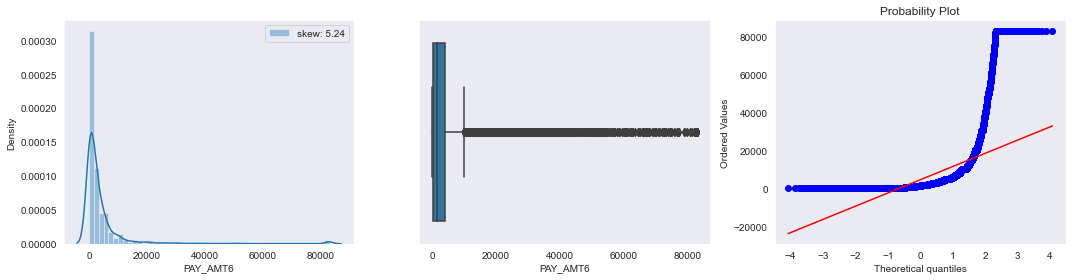

In [25]:
sns.set_style('dark')
for col in pay_amt_columns :
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [85]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [43]:
df.shape

(28034, 24)

## Data Transformation

In [63]:
df.shape

(29964, 18)

In [64]:
df.columns

Index(['limit_bal', 'education', 'marriage', 'age', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'default.payment.next.month'],
      dtype='object')

In [12]:
X,y = (df.drop('default.payment.next.month',axis=1),df['default.payment.next.month'])

In [13]:
 # separate dataset into train and test
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X,y,test_size=0.2,random_state=42)

### Standardisation

### Imputing values in Standard scaler

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
pipeline=Pipeline(steps= [("standard_scaler",StandardScaler())])

In [16]:
data= pipeline.fit_transform(X)

 ### dropping the multicollinearity variables 

### PCA

In [68]:
import pandas as pd
from sklearn.decomposition import PCA

# List of column names to perform PCA on
columns_for_pca = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                   'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


data_for_pca = df[columns_for_pca]

# Apply PCA
n_components = 3  
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_for_pca)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Drop the original columns you used for PCA from the original DataFrame if you want to replace them
df = df.drop(columns=columns_for_pca)

# Concatenate the PCA DataFrame with the original DataFrame
df = pd.concat([df, pca_df], axis=1)

# Print the updated DataFrame
print(df)


       limit_bal  sex  education  marriage   age  PAY_0  PAY_2  PAY_3  PAY_4  \
0        20000.0  2.0        2.0       1.0  24.0    2.0    2.0   -1.0   -1.0   
1       120000.0  2.0        2.0       2.0  26.0   -1.0    2.0    0.0    0.0   
2        90000.0  2.0        2.0       2.0  34.0    0.0    0.0    0.0    0.0   
3        50000.0  2.0        2.0       1.0  37.0    0.0    0.0    0.0    0.0   
4        50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   -1.0    0.0   
...          ...  ...        ...       ...   ...    ...    ...    ...    ...   
28779        NaN  NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN   
28983        NaN  NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN   
29265        NaN  NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN   
29823        NaN  NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN   
29909        NaN  NaN        NaN       NaN   NaN    NaN    NaN    NaN    NaN   

       PAY_5  PAY_6  default.payment.ne

### Modifing the dataset columns

In [17]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school']= (df['education']==3).astype('int')
df['others']= (df['education']==4).astype('int')
df['others']= (df['education']==5).astype('int')
df['others']= (df['education']==6).astype('int')
df['others']= (df['education']==0).astype('int')
df.drop('education',axis=1,inplace=True)

In [18]:
#df['male'] = (df['sex']=='M').astype('int')
df.drop('sex',axis=1,inplace=True)


df['married'] = (df['marriage']==1).astype('int')
df['single'] = (df['marriage']==2).astype('int')
df['na'] = (df['marriage']==3).astype('int')
df['na'] = (df['marriage']==0).astype('int')
df.drop(['marriage'],axis=1,inplace=True)
df.drop(['single'],axis=1,inplace=True)

#### MODIFIED PAY COLUMNS TO INCREASE INTERPRETABILITY OF MODEL

In [19]:
# Define mapping for PAY values to categories
category_mapping = {-2: 'No Dues', -1: 'No Dues', 0: 'Duly Paid', 1: 'One Month Delay', 2: 'Two Months Delay', 3: 'Three Months Delay'}
# Create a category for values >= 4
df['REPAY_1_Category'] = df['PAY_0'].apply(lambda x: 'Four or More Months Delay' if x >= 4 else category_mapping.get(x, 'Unknown'))
df['REPAY_2_Category'] = df['PAY_2'].apply(lambda x: 'Four or More Months Delay' if x >= 4 else category_mapping.get(x, 'Unknown'))
df['REPAY_3_Category'] = df['PAY_3'].apply(lambda x: 'Four or More Months Delay' if x >= 4 else category_mapping.get(x, 'Unknown'))
df['REPAY_4_Category'] = df['PAY_4'].apply(lambda x: 'Four or More Months Delay' if x >= 4 else category_mapping.get(x, 'Unknown'))
df['REPAY_5_Category'] = df['PAY_5'].apply(lambda x: 'Four or More Months Delay' if x >= 4 else category_mapping.get(x, 'Unknown'))
df['REPAY_6_Category'] = df['PAY_6'].apply(lambda x: 'Four or More Months Delay' if x >= 4 else category_mapping.get(x, 'Unknown'))


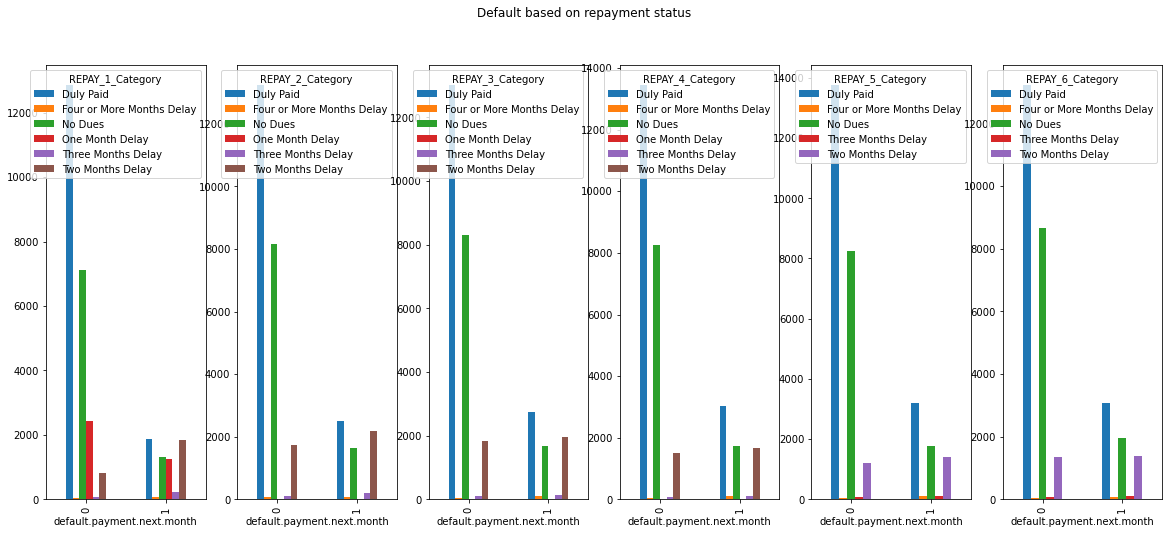

In [72]:
fig, ax = plt.subplots(1,6)
fig.set_size_inches(20,8)
fig.suptitle('Default based on repayment status ')

d = df.groupby(['default.payment.next.month', 'REPAY_1_Category']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['default.payment.next.month', 'REPAY_2_Category']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['default.payment.next.month', 'REPAY_3_Category']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby(['default.payment.next.month', 'REPAY_4_Category']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

d = df.groupby(['default.payment.next.month', 'REPAY_5_Category']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[4])

d = df.groupby(['default.payment.next.month', 'REPAY_6_Category']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[5])

In [20]:
columns_to_drop = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df.drop(columns_to_drop,axis=1,inplace=True)

### One hot encoding

In [21]:
# Specify the columns to one-hot encode
columns_to_encode = ['REPAY_1_Category', 'REPAY_2_Category','REPAY_3_Category', 'REPAY_4_Category', 'REPAY_5_Category','REPAY_6_Category']

# Perform one-hot encoding for the specified columns
pd.get_dummies(df, columns=columns_to_encode)

,limit_bal,age,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,REPAY_5_Category_Duly Paid,REPAY_5_Category_Four or More Months Delay,REPAY_5_Category_No Dues,REPAY_5_Category_Three Months Delay,REPAY_5_Category_Two Months Delay,REPAY_6_Category_Duly Paid,REPAY_6_Category_Four or More Months Delay,REPAY_6_Category_No Dues,REPAY_6_Category_Three Months Delay,REPAY_6_Category_Two Months Delay
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,0,0,0,1,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,1,0,0,0,0,0,0,0,0,1
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,1,0,0,0,0,1,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,...,1,0,0,0,0,1,0,0,0,0
29996,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,...,1,0,0,0,0,1,0,0,0,0
29997,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
29998,80000.0,41,-81.0,78379.0,76304.0,52774.0,11855.0,48944.0,67431.0,3409.0,...,1,0,0,0,0,0,0,1,0,0


In [41]:
df.head()

,limit_bal,sex,age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,others,married,na,REPAY_0_Category,REPAY_1_Category,REPAY_2_Category,REPAY_3_Category,REPAY_4_Category,REPAY_5_Category,REPAY_6_Category
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,0,1,0,Two Months Delay,Two Months Delay,Two Months Delay,No Dues,No Dues,No Dues,No Dues
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,0,0,No Dues,No Dues,Two Months Delay,Duly Paid,Duly Paid,Duly Paid,Two Months Delay
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,0,0,Duly Paid,Duly Paid,Duly Paid,Duly Paid,Duly Paid,Duly Paid,Duly Paid
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,0,1,0,Duly Paid,Duly Paid,Duly Paid,Duly Paid,Duly Paid,Duly Paid,Duly Paid
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,0,1,0,No Dues,No Dues,Duly Paid,No Dues,Duly Paid,Duly Paid,Duly Paid


### Label encoding

In [73]:
# Specify the columns to label encode
columns_to_encode = ['REPAY_1_Category', 'REPAY_2_Category','REPAY_3_Category', 'REPAY_4_Category', 'REPAY_5_Category','REPAY_6_Category']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the resulting DataFrame
print(df)

       limit_bal   age  default.payment.next.month            PC1  \
0        20000.0  24.0                         1.0 -107956.756234   
1       120000.0  26.0                         1.0 -104437.791823   
2        90000.0  34.0                         0.0  -69378.580445   
3        50000.0  37.0                         0.0  -15412.223303   
4        50000.0  57.0                         0.0  -65984.580256   
...          ...   ...                         ...            ...   
28779        NaN   NaN                         NaN  -26871.648655   
28983        NaN   NaN                         NaN   79558.661548   
29265        NaN   NaN                         NaN  -29879.328095   
29823        NaN   NaN                         NaN  -78573.129054   
29909        NaN   NaN                         NaN    5282.513611   

                PC2           PC3  grad_school  university  high_school  \
0      -3024.878069  -2541.617851            0           1            0   
1       2235.028287  

In [39]:
df.columns

Index(['limit_bal', 'age', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'grad_school', 'university', 'high_school', 'others', 'married', 'na',
       'REPAY_1_Category', 'REPAY_2_Category', 'REPAY_3_Category',
       'REPAY_4_Category', 'REPAY_5_Category', 'REPAY_6_Category'],
      dtype='object')

In [40]:
df.head()

,limit_bal,age,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,high_school,others,married,na,REPAY_1_Category,REPAY_2_Category,REPAY_3_Category,REPAY_4_Category,REPAY_5_Category,REPAY_6_Category
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,5,5,2,2,2,2
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,0,2,5,0,0,0,4
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,0,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,2,0,2,0,0,0


In [22]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [23]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    X_train, X_test, y_train, y_test 
 
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
       
        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
       

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        
    report=pd.DataFrame(list(zip(models_list)), columns=['Model Name'])
        
    return report

In [24]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

## Handling imbalanced dataset

In [25]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_train,y_train = smt.fit_resample(X_train_imbalanced,y_train_imbalanced)
X_test,y_test = smt.fit_resample(X_test_imbalanced,y_test_imbalanced)


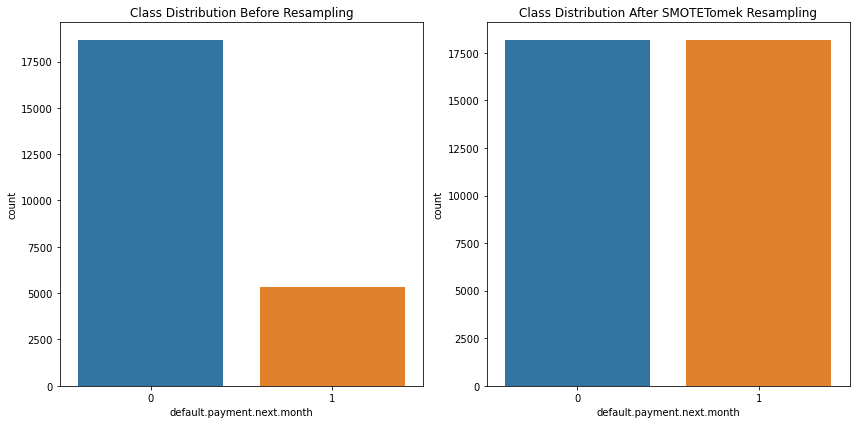

In [16]:
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plots before resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train_imbalanced)
plt.title("Class Distribution Before Resampling")

# Create count plots after resampling
plt.subplot(1, 2, 2)
sns.countplot(y_train)
plt.title("Class Distribution After SMOTETomek Resampling")

plt.tight_layout()
plt.show()


### apply the power transformation

In [55]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Yeo_Johnson_lambdas
0,limit_bal,0.210817
1,sex,0.223733
2,education,-0.400396
3,marriage,-0.578108
4,age,-0.467321
5,PAY_0,0.792102
6,PAY_2,0.751229
7,PAY_3,0.741954
8,PAY_4,0.697518
9,PAY_5,0.705088


## Anomalies detection and handling

In [26]:
# Create an instance of the Isolation Forest algorithm
isolation_forest = IsolationForest()

# Fit the model on the training data
isolation_forest.fit(X_train)

# Predict anomalies (-1) and normal instances (1) on the testing data
predictions = isolation_forest.predict(X_test)


In [27]:
# Assuming you have already trained the Isolation Forest model and obtained predictions
predictions = isolation_forest.predict(X_test)  # Use your test data

# Add the predictions to your DataFrame
df_test = X_test.copy()
df_test['isolation_forest_prediction'] = predictions

# Now you can analyze the predictions, for example, by counting anomalies and normals
anomaly_count = (df_test['isolation_forest_prediction'] == -1).sum()
normal_count = (df_test['isolation_forest_prediction'] == 1).sum()

print("Anomaly count:", anomaly_count)
print("Normal count:", normal_count)

Anomaly count: 945
Normal count: 8033


In [28]:
# Remove rows predicted as anomalies (-1)
df_cleaned_test = df_test[df_test['isolation_forest_prediction'] == 1].copy()

# Drop the 'isolation_forest_prediction' column as it's no longer needed
df_cleaned_test.drop(columns=['isolation_forest_prediction'], inplace=True)


In [31]:
report_const = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9992
- Recall: 0.9998
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7830
- F1 score: 0.7627
- Precision: 0.8416
- Recall: 0.6973
- Roc Auc Score: 0.7830
Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9996
- Recall: 0.9994
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7035
- F1 score: 0.6897
- Precision: 0.7233
- Recall: 0.6592
- Roc Auc Score: 0.7035
Gradient Boosting
Model performance for Training set
- Accuracy: 0.7905
- F1 score: 0.7840
- Precision: 0.8091
- Recall: 0.7604
- Roc Auc Score: 0.7905
----------------------------------
Model performance for Test set
- Accuracy: 0.7839
- F1 score: 0.7760
- Precision: 0.8056
- Recall: 0.7485
- Roc Auc Score: 0.7839
K-Neighbors Classifier
Model performance for Training set

In [104]:
# Function to get and display feature importances for each classifier
def get_feature_importances(models, X, y):
    for name, clf in models.items():
        clf.fit(X, y)
        if hasattr(clf, "feature_importances_"):
            feature_importances = clf.feature_importances_
        elif hasattr(clf, "coef_"):
            feature_importances = clf.coef_[0]
        else:
            print(f"{name} does not support feature importances")
            continue
        
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {name}:")
        print(importance_df)
        print("\n")



get_feature_importances(models, X, y)

Feature Importances for Random Forest:
      Feature  Importance
5       PAY_0    0.095040
4         age    0.067322
11  BILL_AMT1    0.060792
0   limit_bal    0.060423
12  BILL_AMT2    0.053968
13  BILL_AMT3    0.051253
16  BILL_AMT6    0.050946
17   PAY_AMT1    0.050692
14  BILL_AMT4    0.049525
15  BILL_AMT5    0.049106
18   PAY_AMT2    0.047633
19   PAY_AMT3    0.046998
22   PAY_AMT6    0.046918
6       PAY_2    0.045099
21   PAY_AMT5    0.043484
20   PAY_AMT4    0.042996
7       PAY_3    0.030007
10      PAY_6    0.021548
9       PAY_5    0.021261
2   education    0.020573
8       PAY_4    0.018017
3    marriage    0.014371
1         sex    0.012027


Feature Importances for Decision Tree:
      Feature  Importance
5       PAY_0    0.160999
4         age    0.069979
11  BILL_AMT1    0.067874
16  BILL_AMT6    0.056421
19   PAY_AMT3    0.055186
0   limit_bal    0.054760
22   PAY_AMT6    0.050031
12  BILL_AMT2    0.049158
17   PAY_AMT1    0.048327
21   PAY_AMT5    0.048033
18   PAY_A

In [22]:
df.columns

Index(['limit_bal', 'age', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'grad_school', 'university', 'high_school', 'others', 'married', 'na',
       'REPAY_1_Category', 'REPAY_2_Category', 'REPAY_3_Category',
       'REPAY_4_Category', 'REPAY_5_Category', 'REPAY_6_Category'],
      dtype='object')

In [47]:
columns_to_drop = ['BILL_AMT1', 'BILL_AMT3', 'PAY_AMT5']
df.drop(columns_to_drop,axis=1,inplace=True)

### On comparing feature importances of all the models adaboost and random forest are good  models as gradient boost is giving more importance to one feature and very less to others, also random forest is highly overfitted  but on test data it is providing as good accuracy as ada boost so both can be used.Other models are returning less accuracy then them.

### Model accuracy on applying label encoder

In [107]:
report_const = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9990
- Recall: 0.9997
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.7824
- F1 score: 0.7618
- Precision: 0.8416
- Recall: 0.6958
- Roc Auc Score: 0.7824
Decision Tree
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9995
- Recall: 0.9992
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.7070
- F1 score: 0.6931
- Precision: 0.7276
- Recall: 0.6618
- Roc Auc Score: 0.7070
Gradient Boosting
Model performance for Training set
- Accuracy: 0.7924
- F1 score: 0.7858
- Precision: 0.8114
- Recall: 0.7618
- Roc Auc Score: 0.7924
----------------------------------
Model performance for Test set
- Accuracy: 0.7772
- F1 score: 0.7694
- Precision: 0.7975
- Recall: 0.7432
- Roc Auc Score: 0.7772
K-Neighbors Classifier
Model performance for Training set

#### no change in accuracy

### Model accuracy on applying one hot encoder

In [110]:
report_const = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9990
- Recall: 0.9997
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.7810
- F1 score: 0.7601
- Precision: 0.8403
- Recall: 0.6938
- Roc Auc Score: 0.7810
Decision Tree
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9995
- Recall: 0.9992
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.7091
- F1 score: 0.6957
- Precision: 0.7294
- Recall: 0.6649
- Roc Auc Score: 0.7091
Gradient Boosting
Model performance for Training set
- Accuracy: 0.7924
- F1 score: 0.7858
- Precision: 0.8114
- Recall: 0.7618
- Roc Auc Score: 0.7924
----------------------------------
Model performance for Test set
- Accuracy: 0.7772
- F1 score: 0.7694
- Precision: 0.7975
- Recall: 0.7432
- Roc Auc Score: 0.7772
K-Neighbors Classifier
Model performance for Training set

#### using one hot encoder 

### model accuracy  without applying power transformation

In [34]:
report_const = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9991
- Recall: 0.9998
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7827
- F1 score: 0.7622
- Precision: 0.8415
- Recall: 0.6966
- Roc Auc Score: 0.7827
Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9996
- Recall: 0.9994
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7042
- F1 score: 0.6898
- Precision: 0.7250
- Recall: 0.6578
- Roc Auc Score: 0.7042
Gradient Boosting
Model performance for Training set
- Accuracy: 0.7905
- F1 score: 0.7840
- Precision: 0.8091
- Recall: 0.7604
- Roc Auc Score: 0.7905
----------------------------------
Model performance for Test set
- Accuracy: 0.7839
- F1 score: 0.7760
- Precision: 0.8056
- Recall: 0.7485
- Roc Auc Score: 0.7839
K-Neighbors Classifier
Model performance for Training set

### Model accuracy is not improving with power transform so not applying it.

### Imputing values in robust scaler then checking model performanse

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
pipeline_1=Pipeline(steps= [("robust_scaler",RobustScaler())])

In [31]:
data= pipeline_1.fit_transform(X)

In [39]:
report_data = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9993
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7814
- F1 score: 0.7612
- Precision: 0.8384
- Recall: 0.6970
- Roc Auc Score: 0.7814
Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9996
- Recall: 0.9994
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7064
- F1 score: 0.6929
- Precision: 0.7263
- Recall: 0.6625
- Roc Auc Score: 0.7064
Gradient Boosting
Model performance for Training set
- Accuracy: 0.7905
- F1 score: 0.7840
- Precision: 0.8091
- Recall: 0.7604
- Roc Auc Score: 0.7905
----------------------------------
Model performance for Test set
- Accuracy: 0.7839
- F1 score: 0.7760
- Precision: 0.8056
- Recall: 0.7485
- Roc Auc Score: 0.7839
K-Neighbors Classifier
Model performance for Training set

### Scaling the data using Robust scaler Since most of the independent variables are not normally distributed and  we cannot use Standardscaler and most of the data is infused with outliars. also, both the standard scaler and robust scaler are giving almost same accuracy.

### Hyperparameter Tuning 

### APPLIED PCA

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
params= {
    
    'AdaBoost Classifier': { 'n_estimators' : [10, 50, 100, 500],
                             'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
                           
                            },
    
    'Random-forest Classifier':{'n_estimators' : [20,60,100,120],
                                    'max_features' : [0.2,0.6,1.0],
                                    'max_samples' : [0.5,0.75,1.0]
                                    }               

    }

In [35]:
models = {
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random-forest Classifier": RandomForestClassifier()
}

In [36]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

def evaluate_models(X, y, models, params):
    '''
    This function takes in X and y, models dictionary, and parameters dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame which contains a report of all models metrics with cost
    '''

    X_train, X_test, y_train, y_test

    models_list = []

    for model_name, model in models.items():
        model_params = params.get(model_name, {})  # Get hyperparameters for the model

        # Create a RandomizedSearchCV instance for hyperparameter tuning
        random_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=model_params,
                                           cv=3,
                                           n_iter=10,  # Adjust the number of iterations
                                           n_jobs=-1)
        random_search.fit(X_train, y_train)

        best_model = random_search.best_estimator_  # Get the best model

        best_model.fit(X_train, y_train)  # Train the best model

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(model_name)
        models_list.append(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))


        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
       

    report = pd.DataFrame(list(zip(models_list)), columns=['Model Name'])

    return report


In [86]:
evaluate_models(X, y, models, params)

AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.7261
- F1 score: 0.7098
- Precision: 0.7548
- Recall: 0.6698
- Roc Auc Score: 0.7261
----------------------------------
Model performance for Test set
- Accuracy: 0.7261
- F1 score: 0.7082
- Precision: 0.7577
- Recall: 0.6648
- Roc Auc Score: 0.7261


,Model Name
0,AdaBoost Classifier


### Without PCA

In [38]:
evaluate_models(X, y, models, params)

AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.7878
- F1 score: 0.7826
- Precision: 0.8021
- Recall: 0.7640
- Roc Auc Score: 0.7878
----------------------------------
Model performance for Test set
- Accuracy: 0.7822
- F1 score: 0.7751
- Precision: 0.8014
- Recall: 0.7505
- Roc Auc Score: 0.7822
Random-forest Classifier
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9992
- Recall: 0.9997
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7795
- F1 score: 0.7595
- Precision: 0.8350
- Recall: 0.6966
- Roc Auc Score: 0.7795


,Model Name
0,AdaBoost Classifier
1,Random-forest Classifier


### Tried hyperparameter tuning without pca just removed columns based on feature importances and it  returns  improved accuracy on training and test data   then that of pca.